In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "LA_AQS_2023.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
0,6,37,1103,68103,1,34.06659,-118.22688,WGS84,Ambient Min Temperature,24 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
1,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
2,6,37,1103,62201,1,34.06659,-118.22688,WGS84,Relative Humidity,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
3,6,37,1103,62101,1,34.06659,-118.22688,WGS84,Outdoor Temperature,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
4,6,37,1103,42603,1,34.06659,-118.22688,WGS84,Oxides of nitrogen (NOx),1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [6]:
# param is Ozone and timing is "1 HOUR"

In [7]:
df_O3 = df[(df['Parameter Name']=='Ozone')& (df['Duration Description']=='1 HOUR')]

In [10]:
df_O3.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
20,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
64,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
204,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
228,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
271,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [11]:
df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])

date = df_O3["Date (Local)"]
mean_o3 = df_O3["Arithmetic Mean"]

/var/folders/vv/yncyffns1ydg_4gxsbys13v00000gn/T/ipykernel_5471/1503109982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3["Date (Local)"] = pd.to_datetime(df_O3["Date (Local)"])


Text(0.5, 1.0, 'Daily Average Hourly Ozone')

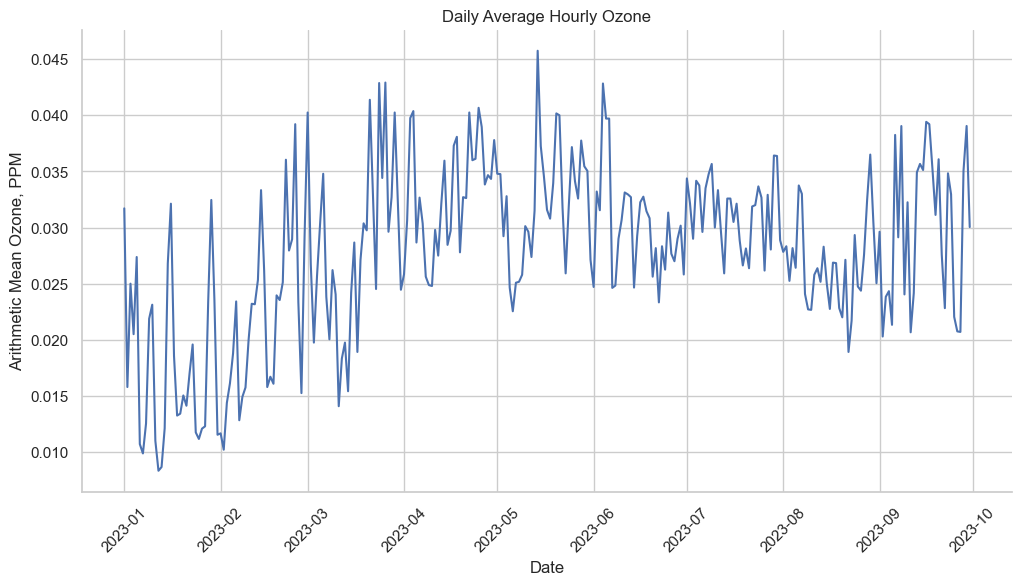

In [66]:
fig, ax = plt.subplots(figsize=(12,6))

sns.set_theme(style="whitegrid")
sns.despine(fig, top=True, right=True)
sns.lineplot(x = date, y = mean_o3, ax=ax)

plt.xlabel('Date')
plt.ylabel('Arithmetic Mean Ozone, PPM')

ax.tick_params(axis='x', rotation=45)

ax.set_title("Daily Average Hourly Ozone")

In [39]:
mean_o3

# its in ppm evidently so look for > 0.035 instead of just 35

20       0.031708
64       0.015792
204      0.025000
228      0.020500
271      0.027375
           ...   
21122    0.020750
21168    0.020700
21218    0.035056
21261    0.039048
21305    0.030042
Name: Arithmetic Mean, Length: 273, dtype: float64

In [32]:
o3_above_35 = df_O3[df_O3["Arithmetic Mean"]>0.035] 

In [70]:
o3_above_35

# there are 43 rows so that means there were 43 days where ozone got higher than 35 ppb

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
4651,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
4928,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
5235,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
7130,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
7337,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
7679,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
7883,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
8427,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
8447,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
9439,6,37,1103,44201,1,34.06659,-118.22688,WGS84,Ozone,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [69]:
df_O3['Arithmetic Mean'].max()

0.04575

In [54]:
indexmax = mean_o3.idxmax()
print(indexmax)

12292


In [65]:
print(df_O3.at[12292, 'Date (Local)'])

2023-05-14 00:00:00


In [68]:
# The max is 0.04575 ppm and this takes place on 5/14/23 